In [1]:
import pandas as pd
import numpy as np

from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./resources/extinction/dlc/60min_x1_1h_EXT_4.csv', header=[1,2], index_col=[0])
df

bodyparts        nose                            leftear              \
coords              x           y likelihood           x           y   
0          123.177933  148.879150   1.000000  113.995659  141.496323   
1          119.410202  152.170044   1.000000  112.932144  143.873062   
2          118.135941  161.516739   1.000000  111.886093  149.028061   
3          117.793068  157.796768   1.000000  111.784340  147.730591   
4          119.346191  155.453873   1.000000  111.508095  145.412430   
...               ...         ...        ...         ...         ...   
7196        43.648617  175.638657   0.206869   53.391884  179.173569   
7197       119.626884  183.198486   0.000065   33.376663  190.351974   
7198        10.302654  188.220428   0.101459   25.063175  194.094040   
7199        17.831781  202.222992   0.000020   28.829458  200.954834   
7200        52.409401  200.202988   0.000148   54.249134  194.154221   

bodyparts               rightear                               neck  ...  \
coords    likelihood           x           y likelihood           x  ...   
0                1.0  108.802361  152.560562   1.000000  109.415627  ...   
1                1.0  105.397881  154.381973   1.000000  107.673691  ...   
2                1.0  101.260460  156.166855   1.000000  105.630119  ...   
3                1.0  101.725777  155.244247   1.000000  105.482697  ...   
4                1.0  102.443932  154.970657   1.000000  106.509781  ...   
...              ...         ...         ...        ...         ...  ...   
7196             1.0   45.077557  171.047623   1.000000   50.065140  ...   
7197             1.0   24.178202  183.056763   1.000000   30.136538  ...   
7198             1.0   14.711369  183.276184   1.000000   22.952438  ...   
7199             1.0   15.605181  191.681091   1.000000   25.128241  ...   
7200             1.0   42.951454  193.109543   0.999996   49.590649  ...   

bodyparts      tail1       tail2                              tail3  \
coords    likelihood           x           y likelihood           x   
0                1.0   59.791824  117.849159   1.000000   48.369423   
1                1.0   60.108246  117.899796   1.000000   48.555641   
2                1.0   60.013668  117.001038   1.000000   48.622112   
3                1.0   60.036045  116.740471   1.000000   48.592777   
4                1.0   60.242599  116.857292   1.000000   48.784065   
...              ...         ...         ...        ...         ...   
7196             1.0  117.997498  176.347092   0.999999  132.978149   
7197             1.0   94.359428  167.454803   1.000000  110.193336   
7198             1.0   90.768867  160.745285   1.000000  109.224411   
7199             1.0   94.063049  157.260483   1.000000  113.425171   
7200             1.0   90.226227  145.005142   1.000000  109.183289   

bodyparts                              tail4                         
coords              y likelihood           x           y likelihood  
0          111.204178   1.000000   46.848885   97.373825   1.000000  
1          111.330940   1.000000   46.879013   97.327644   1.000000  
2          110.696136   1.000000   46.685303   97.290222   1.000000  
3          110.639336   1.000000   46.699959   97.177841   1.000000  
4          110.768616   1.000000   46.731392   97.168236   1.000000  
...               ...        ...         ...         ...        ...  
7196       190.208160   0.999805  158.128006  196.664154   0.081993  
7197       178.727890   1.000000  122.175621  188.583557   0.999178  
7198       167.892517   1.000000  127.835907  173.875366   0.999997  
7199       161.990982   1.000000  132.631012  168.353409   1.000000  
7200       145.615814   1.000000  129.620651  149.024551   1.000000  

[7201 rows x 36 columns]

In [3]:
df.columns

MultiIndex([(    'nose',          'x'),
            (    'nose',          'y'),
            (    'nose', 'likelihood'),
            ( 'leftear',          'x'),
            ( 'leftear',          'y'),
            ( 'leftear', 'likelihood'),
            ('rightear',          'x'),
            ('rightear',          'y'),
            ('rightear', 'likelihood'),
            (    'neck',          'x'),
            (    'neck',          'y'),
            (    'neck', 'likelihood'),
            (   'body1',          'x'),
            (   'body1',          'y'),
            (   'body1', 'likelihood'),
            (   'body2',          'x'),
            (   'body2',          'y'),
            (   'body2', 'likelihood'),
            (   'body3',          'x'),
            (   'body3',          'y'),
            (   'body3', 'likelihood'),
            (   'body4',          'x'),
            (   'body4',          'y'),
            (   'body4', 'likelihood'),
            (   'tail1',          'x'),


In [4]:
bodyparts = list(set([body for (body, value) in df.columns]))
drop_columns = [(body, 'likelihood') for body in bodyparts]
df.drop(drop_columns, axis=1, inplace=True)
df

bodyparts        nose                 leftear                rightear  \
coords              x           y           x           y           x   
0          123.177933  148.879150  113.995659  141.496323  108.802361   
1          119.410202  152.170044  112.932144  143.873062  105.397881   
2          118.135941  161.516739  111.886093  149.028061  101.260460   
3          117.793068  157.796768  111.784340  147.730591  101.725777   
4          119.346191  155.453873  111.508095  145.412430  102.443932   
...               ...         ...         ...         ...         ...   
7196        43.648617  175.638657   53.391884  179.173569   45.077557   
7197       119.626884  183.198486   33.376663  190.351974   24.178202   
7198        10.302654  188.220428   25.063175  194.094040   14.711369   
7199        17.831781  202.222992   28.829458  200.954834   15.605181   
7200        52.409401  200.202988   54.249134  194.154221   42.951454   

bodyparts                    neck                   body1              ...  \
coords              y           x           y           x           y  ...   
0          152.560562  109.415627  145.835785  102.338486  143.771866  ...   
1          154.381973  107.673691  147.544601  101.635048  144.971268  ...   
2          156.166855  105.630119  150.792419  101.209297  145.010315  ...   
3          155.244247  105.482697  150.097977  100.816963  145.198425  ...   
4          154.970657  106.509781  148.467484  100.698853  145.073044  ...   
...               ...         ...         ...         ...         ...  ...   
7196       171.047623   50.065140  173.789352   58.777145  170.131073  ...   
7197       183.056763   30.136538  186.087112   37.449684  179.082047  ...   
7198       183.276184   22.952438  189.227097   33.320778  183.677933  ...   
7199       191.681091   25.128241  196.142212   33.237228  186.850952  ...   
7200       193.109543   49.590649  190.637833   48.806774  182.385406  ...   

bodyparts      body4                  tail1                   tail2  \
coords             x           y          x           y           x   
0          78.516235  132.483887  71.839684  123.846992   59.791824   
1          79.362389  132.400284  71.639305  125.105423   60.108246   
2          78.684723  129.469788  72.022598  122.982491   60.013668   
3          79.432556  130.882355  71.573311  123.159782   60.036045   
4          79.206169  131.430725  72.047302  123.434120   60.242599   
...              ...         ...        ...         ...         ...   
7196       87.375755  166.818909  97.695358  165.941956  117.997498   
7197       65.164574  165.976776  75.115807  163.667328   94.359428   
7198       61.485050  168.119629  71.096123  162.092117   90.768867   
7199       62.335224  166.010727  72.901627  159.393127   94.063049   
7200       61.803471  155.839417  70.742043  150.592255   90.226227   

bodyparts                   tail3                   tail4              
coords              y           x           y           x           y  
0          117.849159   48.369423  111.204178   46.848885   97.373825  
1          117.899796   48.555641  111.330940   46.879013   97.327644  
2          117.001038   48.622112  110.696136   46.685303   97.290222  
3          116.740471   48.592777  110.639336   46.699959   97.177841  
4          116.857292   48.784065  110.768616   46.731392   97.168236  
...               ...         ...         ...         ...         ...  
7196       176.347092  132.978149  190.208160  158.128006  196.664154  
7197       167.454803  110.193336  178.727890  122.175621  188.583557  
7198       160.745285  109.224411  167.892517  127.835907  173.875366  
7199       157.260483  113.425171  161.990982  132.631012  168.353409  
7200       145.005142  109.183289  145.615814  129.620651  149.024551  

[7201 rows x 24 columns]

In [5]:
left_ear_x = df.loc[:, ('leftear', 'x')]
left_ear_y = df.loc[:, ('leftear', 'y')]

right_ear_x = df.loc[:, ('rightear', 'x')]
right_ear_y = df.loc[:, ('rightear', 'y')]

center_ear_x = (left_ear_x + right_ear_x) / 2.0
center_ear_y = (left_ear_y + right_ear_y) / 2.0

In [6]:
body_parts = df.columns.get_level_values(0).unique(0).to_list()
iterables = [body_parts, ['distance', 'theta']]
columns = pd.MultiIndex.from_product(iterables, names=['bodyparts', 'coords'])
polar_df = pd.DataFrame(columns=columns)
for body_part in body_parts:
    x = df.loc[:, (body_part, 'x')]
    y = df.loc[:, (body_part, 'y')]
    
    diff_x = center_ear_x - x
    diff_y = center_ear_y - y
    distance = np.sqrt(diff_x**2 + diff_y**2)
    theta = np.arctan2(diff_x, diff_y)
    
    polar_df.loc[:, (body_part, 'distance')] = distance
    polar_df.loc[:, (body_part, 'theta')] = theta
    
polar_df

bodyparts       nose             leftear            rightear            \
coords      distance     theta  distance     theta  distance     theta   
0          11.923429 -1.726643  6.111214 -0.438850  6.111214  2.702742   
1          10.687417 -1.859472  6.465337 -0.622005  6.465337  2.519587   
2          14.603040 -2.227845  6.400517 -0.979216  6.400517  2.162376   
3          12.713990 -2.090073  6.277534 -0.929224  6.277534  2.212369   
4          13.442969 -1.973010  6.586326 -0.758874  6.586326  2.382719   
...              ...       ...       ...       ...       ...       ...   
7196        5.611007  1.665047  5.812896 -2.344736  5.812896  0.796856   
7197       90.917073 -1.532225  5.870090 -2.241310  5.870090  0.900283   
7198        9.595875  1.522352  7.486419 -2.378206  7.486419  0.763387   
7199        7.355428  2.502794  8.075949 -2.182372  8.075949  0.959221   
7200        7.595310 -2.616252  5.672938 -1.663002  5.672938  1.478590   

bodyparts      neck                body1            ...      body4            \
coords     distance     theta   distance     theta  ...   distance     theta   
0          2.314355  1.029403   9.628000  1.225750  ...  35.955819  1.154351   
1          2.174779  0.755613   8.600859  1.066448  ...  34.175967  1.059344   
2          2.036593  0.481496   9.291771  0.615397  ...  36.230658  0.878450   
3          1.884000  0.741441   8.649417  0.756708  ...  34.221160  0.924649   
4          1.785989  0.264110   8.099493  0.886726  ...  33.513170  0.976647   
...             ...       ...        ...       ...  ...        ...       ...   
7196       1.560539 -0.561122  10.763527 -1.089838  ...  39.031918 -1.356732   
7197       1.492706 -1.144485  11.545897 -0.849744  ...  41.876690 -1.052999   
7198       3.112715 -1.745808  14.336350 -1.214010  ...  46.403817 -1.111648   
7199       2.916222 -1.510493  14.527996 -0.861053  ...  50.278970 -0.923814   
7200       3.153590 -0.319446  11.248370 -0.018357  ...  40.032416 -0.336105   

bodyparts      tail1                tail2                tail3            \
coords      distance     theta   distance     theta   distance     theta   
0          45.851062  1.040740  59.285176  1.056198  72.499012  1.053957   
1          44.556029  1.001376  58.152704  1.003925  71.428826  1.013198   
2          45.505996  0.862168  58.608039  0.918058  71.512643  0.944771   
3          45.168688  0.892905  58.223849  0.931312  71.073320  0.958520   
4          43.999711  0.917097  57.403696  0.951210  70.288477  0.975356   
...              ...       ...        ...       ...        ...       ...   
7196       49.320355 -1.383809  68.773894 -1.588776  85.093469 -1.749164   
7197       51.748915 -1.109433  68.348694 -1.285296  81.805707 -1.473136   
7198       57.702112 -1.091825  76.189465 -1.195321  91.724895 -1.342124   
7199       62.708392 -0.941181  81.775887 -1.072857  97.453649 -1.210834   
7200       48.401100 -0.475141  64.009984 -0.707984  77.303570 -0.900604   

bodyparts       tail4            
coords       distance     theta  
0           81.438932  0.915094  
1           81.010941  0.877055  
2           81.519689  0.825142  
3           80.970027  0.835595  
4           80.255128  0.849066  
...               ...       ...  
7196       111.005872 -1.766203  
7197        93.417091 -1.590914  
7198       108.959793 -1.434455  
7199       113.899955 -1.322742  
7200        92.488444 -1.067516  

[7201 rows x 24 columns]

In [7]:
tsne = TSNE(n_components=2)
x_embedded = tsne.fit_transform(polar_df.to_numpy())
x_embedded

array([[ -8.629958,  69.4232  ],
       [-10.978023,  70.22092 ],
       [ -9.861438,  69.2826  ],
       ...,
       [ 13.099593, -28.16157 ],
       [ 18.505089, -45.493137],
       [ 10.804661,  41.09141 ]], dtype=float32)

In [8]:
xy = pd.read_csv('./resources/extinction/dlc/60min_x1_1h_EXT_4_XY.tsv', sep="\t", header=[34], index_col=[0])
freezing_index = xy[xy['FZ'] == 1].index
freezing_df = df.iloc[freezing_index, :]
freezing_df

tsne = TSNE(n_components=2)
x_embedded = tsne.fit_transform(freezing_df.to_numpy())
x_embedded

array([[-1.592403 , 69.39431  ],
       [-3.8202286, 68.777145 ],
       [-3.3170755, 68.87838  ],
       ...,
       [18.112286 , 24.587671 ],
       [27.331074 , 13.283699 ],
       [28.077276 ,  7.448141 ]], dtype=float32)

In [9]:
index_series = pd.Series(freezing_df.index)
len(index_series[index_series <= 3600])

1689

ValueError: 'c' argument has 3200 elements, which is inconsistent with 'x' and 'y' with size 7201.

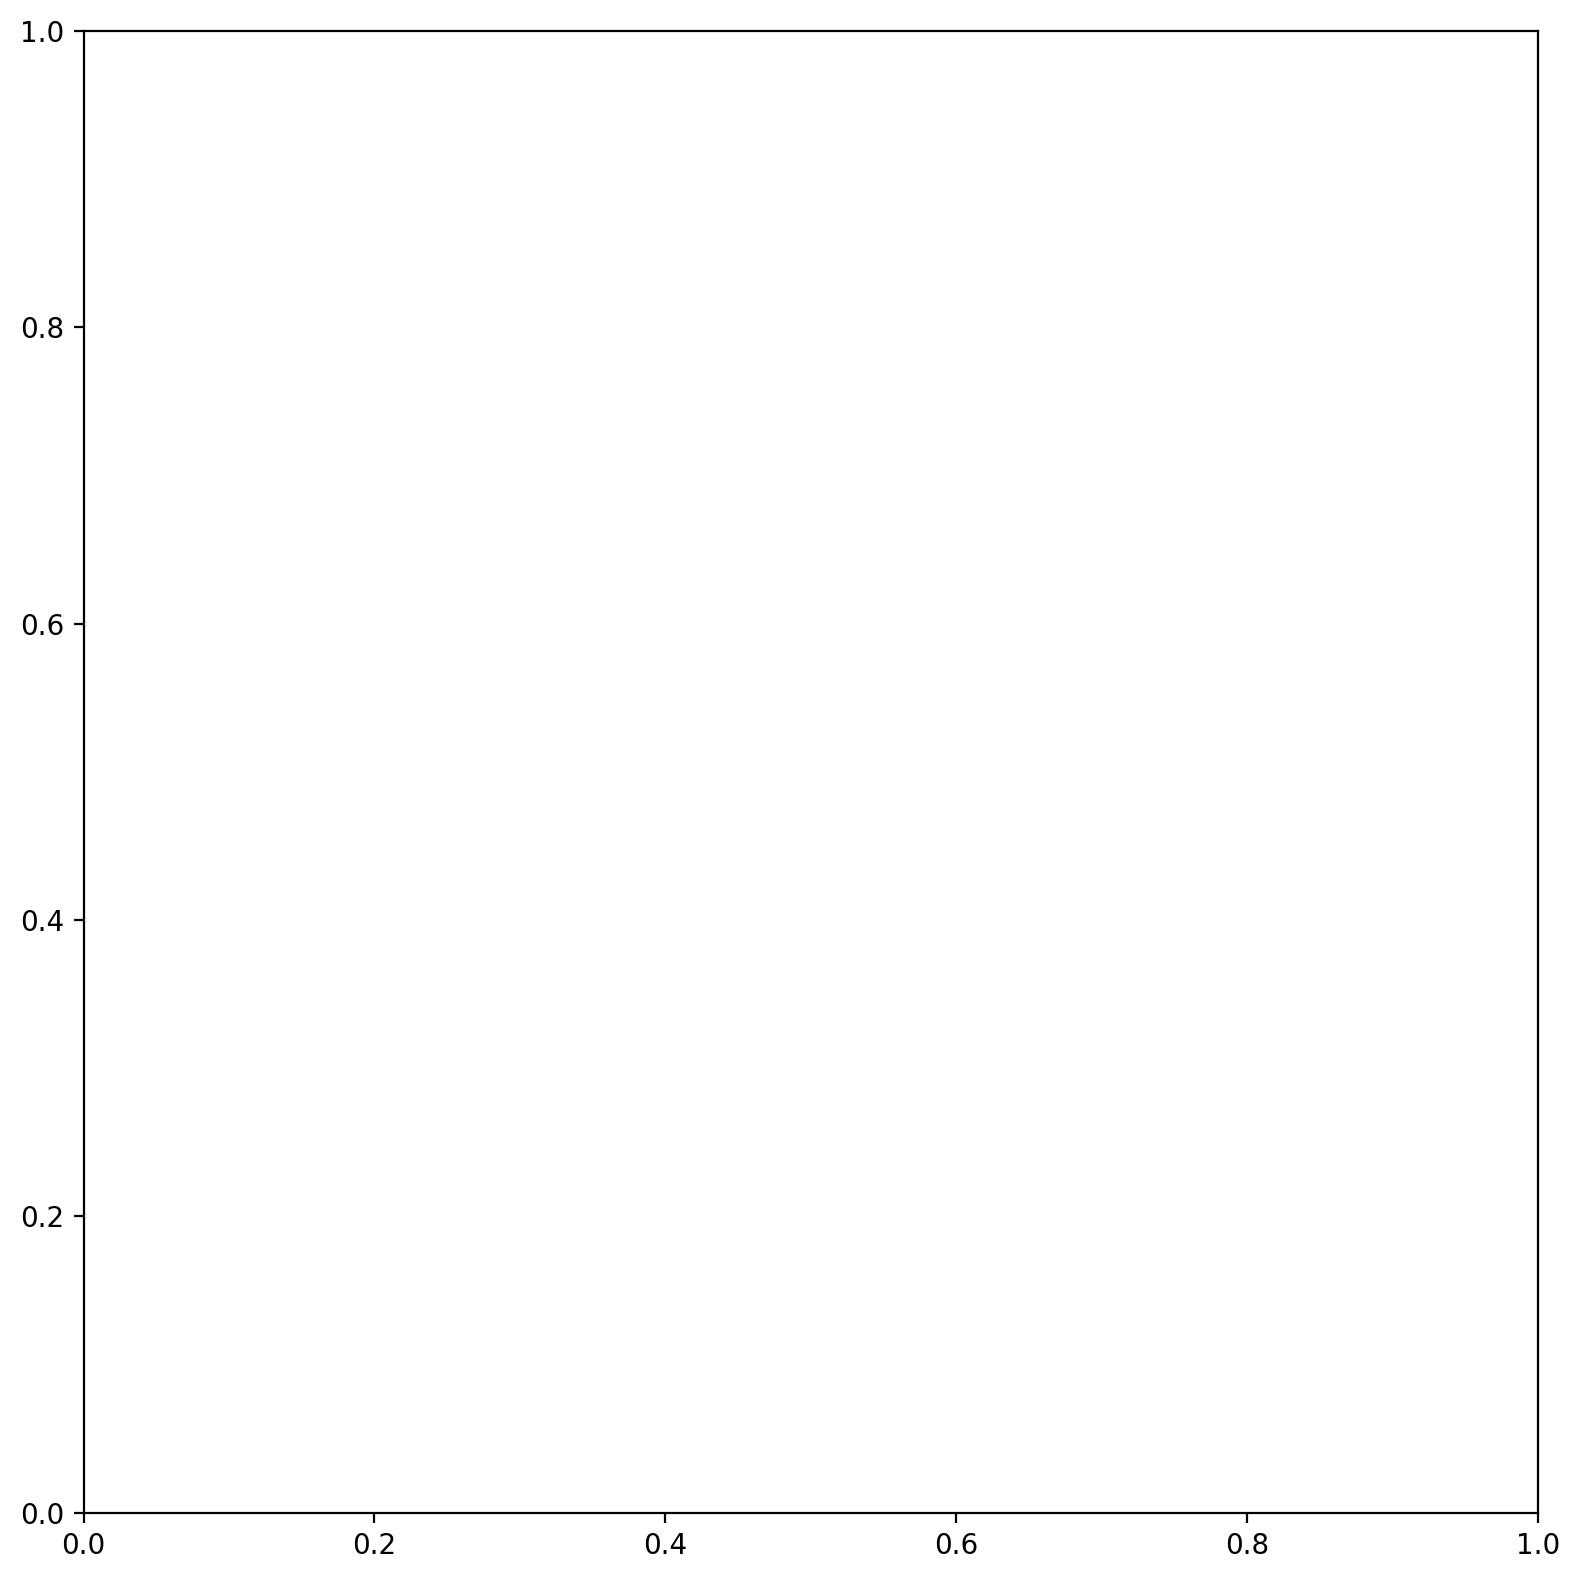

In [16]:
x, y = zip(*x_embedded)
fig, ax = plt.subplots(1, figsize=(8, 8), dpi=200, tight_layout=True)

size = len(df)
# freezing_size = int(size / 3 * 2 + 1)
# sleeping_size = int(size / 3)

freezing_size = len(index_series[index_series <= 360])
sleeping_size = len(index_series[index_series > 360])
colors = ['green'] * freezing_size + ['0.9'] * sleeping_size
colors = ['red' if df_index >= 5040 and df_index < 5400 else colors[i] for i, df_index in enumerate(index_series)]
colors = ['royalblue' if df_index >= 5400 and df_index < 5760 else colors[i] for i, df_index in enumerate(index_series)]
colors = ['orange' if df_index >= 5760 and df_index < 6120 else colors[i] for i, df_index in enumerate(index_series)]
colors = ['purple' if df_index >= 6120 and df_index < 6480 else colors[i] for i, df_index in enumerate(index_series)]
ax.scatter(x=x, y=y, c=colors, alpha=.1)
plt.show()

In [18]:
def convert_polar_df(xy_df):
    body_parts = xy_df.columns.get_level_values(0).unique(0).to_list()
    iterables = [body_parts, ['distance', 'theta']]
    columns = pd.MultiIndex.from_product(iterables, names=['bodyparts', 'coords'])
    polar_df = pd.DataFrame(columns=columns)
    
    left_ear_x = xy_df.loc[:, ('leftear', 'x')]
    left_ear_y = xy_df.loc[:, ('leftear', 'y')]
    
    right_ear_x = xy_df.loc[:, ('rightear', 'x')]
    right_ear_y = xy_df.loc[:, ('rightear', 'y')]
    
    center_ear_x = (left_ear_x + right_ear_x) / 2.0
    center_ear_y = (left_ear_y + right_ear_y) / 2.0
    
    for body_part in body_parts:
        x = xy_df.loc[:, (body_part, 'x')]
        y = xy_df.loc[:, (body_part, 'y')]
        
        diff_x = center_ear_x - x
        diff_y = center_ear_y - y
        distance = np.sqrt(diff_x**2 + diff_y**2)
        theta = np.arctan2(diff_x, diff_y)
        
        polar_df.loc[:, (body_part, 'distance')] = distance
        polar_df.loc[:, (body_part, 'theta')] = theta
        
    return polar_df

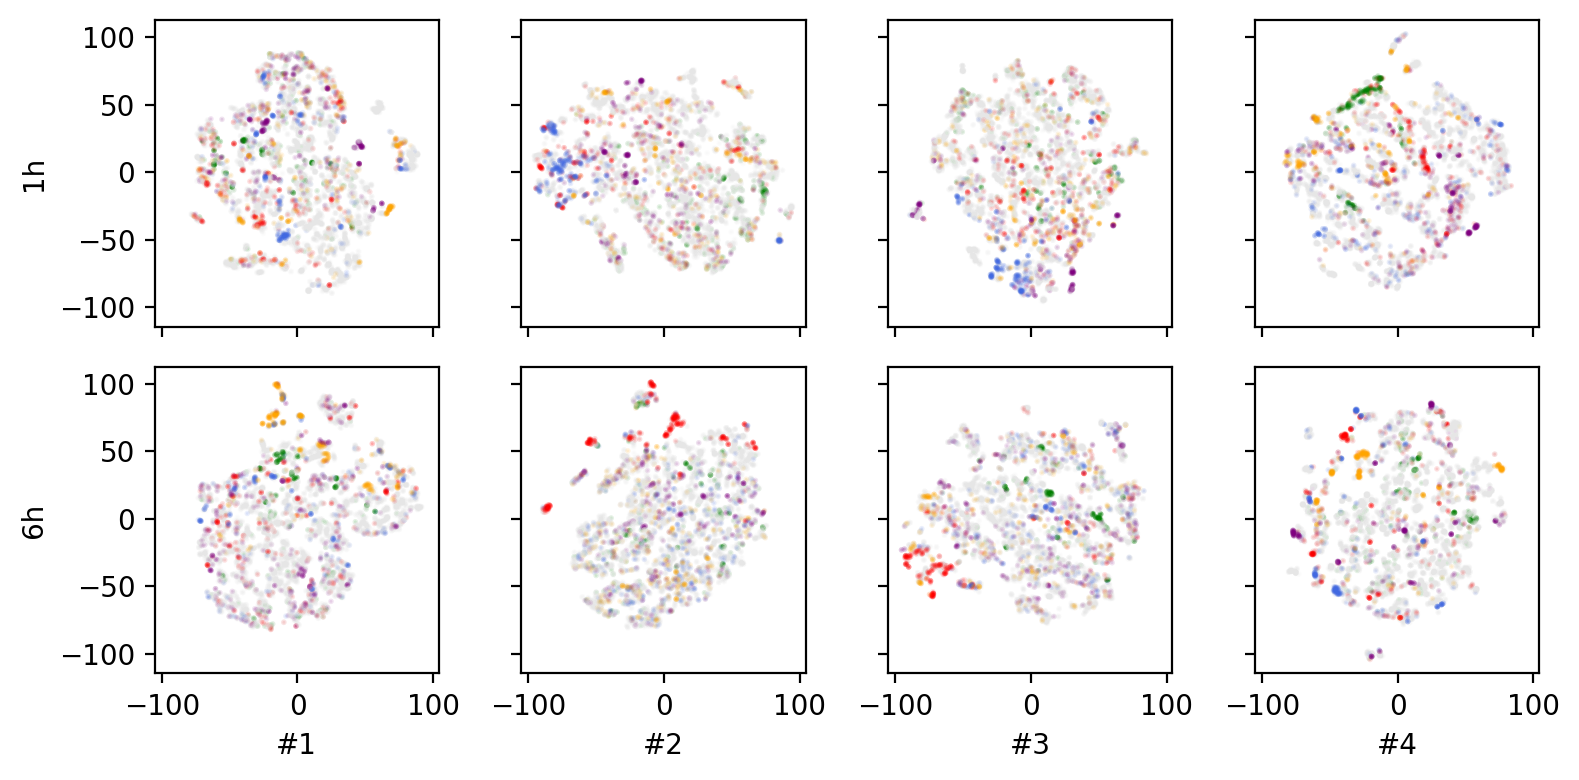

In [19]:
intervals = ['1h', '6h']
count = 4

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(8, 4), dpi=200, tight_layout=True, sharey=True, sharex=True)

for interval_index, interval in enumerate(intervals):
    for number in range(1, 5):
        ax = axes[interval_index][number - 1]
        filepath = './resources/extinction/dlc/60min_x1_%s_EXT_%d.csv' % (interval, number)
        
        df = pd.read_csv(filepath, header=[1, 2], index_col=[0])
        
        body_parts = df.columns.get_level_values(0).unique(0).to_list()
        drop_columns = [(body, 'likelihood') for body in bodyparts]
        df.drop(drop_columns, axis=1, inplace=True)
        
        polar_df = convert_polar_df(df)
    
        tsne = TSNE(n_components=2)
        x_embedded = tsne.fit_transform(polar_df.to_numpy())
        
        xy = pd.read_csv('./resources/extinction/dlc/60min_x1_%s_EXT_%d_XY.tsv' % (interval, number), sep="\t", header=[34], index_col=[0])
        
        x, y = zip(*x_embedded)
        size = len(polar_df)
        
        freezing_size = 360
        sleeping_size = size - 360
        colors = ['green'] * freezing_size + ['0.9'] * sleeping_size
        colors = ['red' if i >= 5040 and i < 5400 else color for i, color in enumerate(colors)]
        colors = ['royalblue' if i >= 5400 and i < 5760 else color for i, color in enumerate(colors)]
        colors = ['orange' if i >= 5760 and i < 6120 else color for i, color in enumerate(colors)]
        colors = ['purple' if i >= 6120 and i < 6480 else color for i, color in enumerate(colors)]

        ax.scatter(x=x, y=y, s=1.0, c=colors, alpha=.1)
        if number == 1:
            ax.set_ylabel(interval)
        if interval == '6h':
            ax.set_xlabel('#%d' % number)
plt.show()

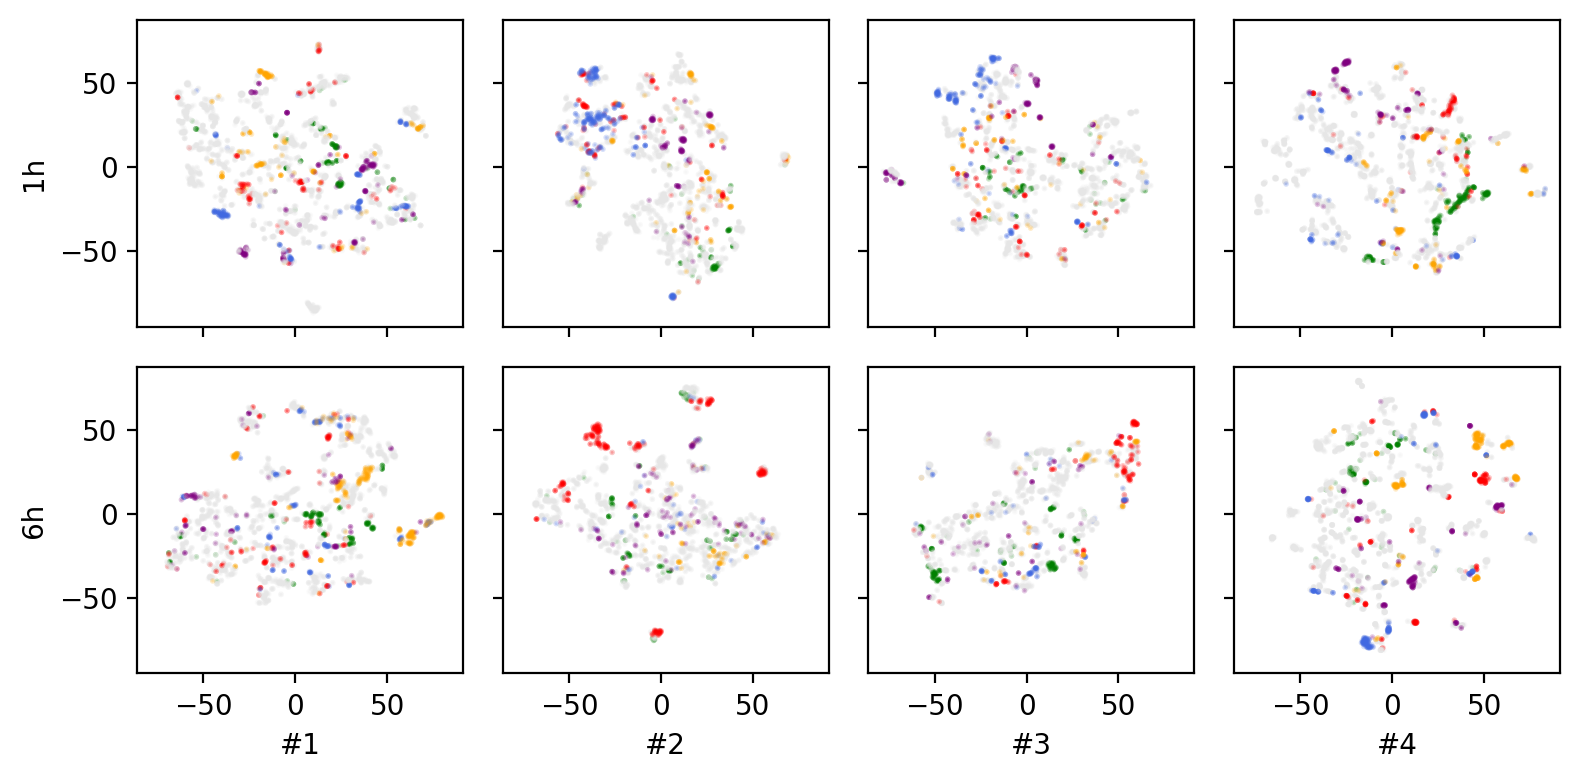

In [20]:
intervals = ['1h', '6h']
count = 4

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(8, 4), dpi=200, tight_layout=True, sharey=True, sharex=True)

for interval_index, interval in enumerate(intervals):
    for number in range(1, 5):
        ax = axes[interval_index][number - 1]
        filepath = './resources/extinction/dlc/60min_x1_%s_EXT_%d.csv' % (interval, number)
        
        df = pd.read_csv(filepath, header=[1, 2], index_col=[0])
        
        bodyparts = list(set([body for (body, value) in df.columns]))
        drop_columns = [(body, 'likelihood') for body in bodyparts]
        df.drop(drop_columns, axis=1, inplace=True)
        
        polar_df = convert_polar_df(df)
            
        xy = pd.read_csv('./resources/extinction/dlc/60min_x1_%s_EXT_%d_XY.tsv' % (interval, number), sep="\t", header=[34], index_col=[0])
        freezing_index = xy[xy['FZ'] == 1].index
        freezing_df = polar_df.iloc[freezing_index, :]
        freezing_df
        
        tsne = TSNE(n_components=2)
        x_embedded = tsne.fit_transform(freezing_df.to_numpy())
        x_embedded
        
        x, y = zip(*x_embedded)
        
        size = len(df)
        
        index_series = pd.Series(freezing_df.index)
        freezing_size = len(index_series[index_series <= 360])
        sleeping_size = len(index_series[index_series > 360])
        colors = ['green'] * freezing_size + ['0.9'] * sleeping_size
        colors = ['red' if df_index >= 5040 and df_index < 5400 else colors[i] for i, df_index in enumerate(index_series)]
        colors = ['royalblue' if df_index >= 5400 and df_index < 5760 else colors[i] for i, df_index in enumerate(index_series)]
        colors = ['orange' if df_index >= 5760 and df_index < 6120 else colors[i] for i, df_index in enumerate(index_series)]
        colors = ['purple' if df_index >= 6120 and df_index < 6480 else colors[i] for i, df_index in enumerate(index_series)]

        ax.scatter(x=x, y=y, s=1.0, c=colors, alpha=.2)
        
        if number == 1:
            ax.set_ylabel(interval)
        if interval == '6h':
            ax.set_xlabel('#%d' % number)
plt.show()

In [13]:
#intervals = ['1h', '6h']
#count = 4
#
#fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(8, 4), dpi=200, tight_layout=True, sharey=True, sharex=True)
#
#for interval_index, interval in enumerate(intervals):
#    for number in range(1, 9, 2):
#        ax = axes[interval_index][int((number - 1) / 2)]
#        filepath_1 = './resources/extinction/dlc/30min_x2_%s_EXT_%d.csv' % (interval, number)
#        filepath_2 = './resources/extinction/dlc/30min_x2_%s_EXT_%d.csv' % (interval, number + 1)
#        
#        df_1 = pd.read_csv(filepath_1, header=[1, 2], index_col=[0])
#        df_2 = pd.read_csv(filepath_2, header=[1, 2], index_col=[0])
#        
#        df = pd.concat([df_1, df_2])
#        
#        bodyparts = list(set([body for (body, value) in df.columns]))
#        drop_columns = [(body, 'likelihood') for body in bodyparts]
#        df.drop(drop_columns, axis=1, inplace=True)
#        
#        neck_df = df.loc[:, [('neck', 'x'), ('neck', 'y')]]
#        x_index = [number for number in range(0, len(df.columns), 2)]
#        y_index = [number for number in range(1, len(df.columns), 2)]
#        for index, (key, series) in enumerate(df.iteritems()):
#            if index % 2 == 0:
#                series -= neck_df.iloc[:, 0]
#            else:
#                series -= neck_df.iloc[:, 1]
#                
#            df.iloc[:, index] = series
#    
#        tsne = TSNE(n_components=2)
#        x_embedded = tsne.fit_transform(df.to_numpy())
#        
#        xy_1 = pd.read_csv('./resources/extinction/dlc/30min_x2_%s_EXT_%d_XY.tsv' % (interval, number), sep="\t", header=[34], index_col=[0])
#        xy_2 = pd.read_csv('./resources/extinction/dlc/30min_x2_%s_EXT_%d_XY.tsv' % (interval, number + 1), sep="\t", header=[34], index_col=[0])
#        
#        x, y = zip(*x_embedded)
#        size = len(df)
#        # freezing_size = int(size / 3 * 2 + 1)
#        # sleeping_size = int(size / 3)
#        
#        freezing_size = len(df_1)
#        sleeping_size = len(df_2)
#        colors = ['royalblue'] * freezing_size + ['firebrick'] * sleeping_size
#        for index, fz in enumerate(xy_1['FZ']):
#            if fz == 0:
#                continue
#            
#            colors[index] = 'green'
#            
#        for index, fz in enumerate(xy_2['FZ']):
#            if fz == 0:
#                continue
#                
#            colors[index] = 'orange'
#        ax.scatter(x=x, y=y, s=1.0, c=colors, alpha=.2)
#        if number == 1:
#            ax.set_ylabel(interval)
#        if interval == '6h':
#            ax.set_xlabel('#%d' % int((number + 1) / 2))
#plt.show()

In [14]:
#intervals = ['1h', '6h']
#count = 4
#
#fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(8, 4), dpi=200, tight_layout=True, sharey=True, sharex=True)
#
#for interval_index, interval in enumerate(intervals):
#    for number in range(1, 9, 2):
#        ax = axes[interval_index][int((number - 1) / 2)]
#        filepath_1 = './resources/extinction/dlc/30min_x2_%s_EXT_%d.csv' % (interval, number)
#        filepath_2 = './resources/extinction/dlc/30min_x2_%s_EXT_%d.csv' % (interval, number + 1)
#        
#        df_1 = pd.read_csv(filepath_1, header=[1, 2], index_col=[0])
#        df_2 = pd.read_csv(filepath_2, header=[1, 2], index_col=[0])
#            
#        xy_1 = pd.read_csv('./resources/extinction/dlc/30min_x2_%s_EXT_%d_XY.tsv' % (interval, number), sep="\t", header=[34], index_col=[0])
#        freezing_index_1 = xy_1[xy_1['FZ'] == 1].index
#        freezing_df_1 = df_1.iloc[freezing_index_1, :]
#        
#        xy_2 = pd.read_csv('./resources/extinction/dlc/30min_x2_%s_EXT_%d_XY.tsv' % (interval, number + 1), sep="\t", header=[34], index_col=[0])
#        freezing_index_2 = xy_2[xy_2['FZ'] == 1].index
#        freezing_df_2 = df_2.iloc[freezing_index_2, :]
#        
#        freezing_df = pd.concat([freezing_df_1, freezing_df_2])
#        
#        bodyparts = list(set([body for (body, value) in freezing_df.columns]))
#        drop_columns = [(body, 'likelihood') for body in bodyparts]
#        freezing_df.drop(drop_columns, axis=1, inplace=True)
#        
#        neck_df = freezing_df.loc[:, [('neck', 'x'), ('neck', 'y')]]
#        x_index = [freezing_number for freezing_number in range(0, len(freezing_df.columns), 2)]
#        y_index = [freezing_number for freezing_number in range(1, len(freezing_df.columns), 2)]
#        for index, (key, series) in enumerate(freezing_df.iteritems()):
#            if index % 2 == 0:
#                series -= neck_df.iloc[:, 0]
#            else:
#                series -= neck_df.iloc[:, 1]
#                
#            freezing_df.iloc[:, index] = series
#        
#        tsne = TSNE(n_components=2)
#        x_embedded = tsne.fit_transform(freezing_df.to_numpy())
#        x_embedded
#        
#        x, y = zip(*x_embedded)
#        
#        freezing_size = len(freezing_df_1)
#        sleeping_size = len(freezing_df_2)
#        colors = ['green'] * freezing_size + ['orange'] * sleeping_size
#        ax.scatter(x=x, y=y, s=1.0, c=colors, alpha=.2)
#        
#        if number == 1:
#            ax.set_ylabel(interval)
#        if interval == '6h':
#            ax.set_xlabel('#%d' % int((number + 1) / 2))
#plt.show()